In [4]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
ExpMat2, ExpZscoreMat2, ExpMatNorm2, ExpZscoreMatNorm2 = LoadExpressionMatrices(
                        ExpMat = "../dat/allen-mouse-exp/new-energy-conn-model.csv", 
                        ExpZscoreMat = "../dat/allen-mouse-exp/new-energy-conn-zscore.csv",
                        ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv",
                        ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (38,45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [6]:
def MakeMatchDF(GeneWeightDict, N=1000):
    DIR = "/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg"
    Dat = []
    Index = []
    for k, v in list(GeneWeightDict.items()):
        try:
            match_genes = loadgenelist(DIR+"/"+str(k)+".txt")
            Dat.append(match_genes[:N])
            Index.append(k)
        except:
            print(DIR+"/"+str(k)+".txt")
            print(k, "Not Found in Dataset")
            GeneWeightDict.pop(k)
    df = pd.DataFrame(data=Dat, index=Index)
    return df

In [7]:
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")

In [48]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)

,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [51]:
jon50 = set(meta_jon.head(50).index.values)
jw50 = set(ASD_Meta_Spec.head(50).index.values)

In [54]:
print(len(jon50.intersection(jw50)))

48


In [56]:
dat1 = []
dat2 = []
for i, row in meta_jon.iterrows():
    dat1.append(row["EFFECT"])
    dat2.append(ASD_Meta_Spec.loc[i, "EFFECT"])

(0.9927482867227027, 4.084453790620499e-196)

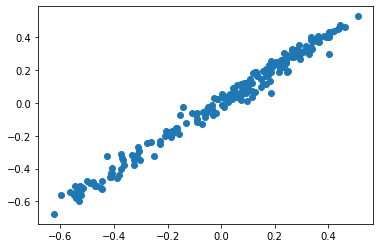

In [58]:
plt.scatter(dat1, dat2)
pearsonr(dat1, dat2)

In [62]:
dat1 = []
dat2 = []
for i, row in meta_jon.iterrows():
    dat1.append(row["EFFECT"])
    dat2.append(ASD_Meta_Spec2.loc[i, "EFFECT"])

ValueError: array must not contain infs or NaNs

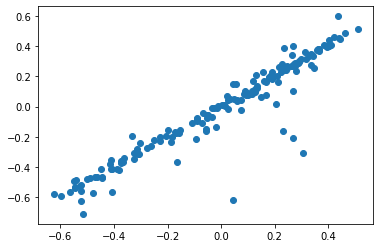

In [63]:
plt.scatter(dat1, dat2)
pearsonr(dat1, dat2)

In [61]:
ASD_Meta_Spec2 = pd.read_csv("dat/bias/ASD.Meta.Spec.bias.2.csv", index_col="STR")

In [64]:
ASD_Meta_Spec2

,EFFECT,REGION,Rank
STR,,,
Infralimbic_area,0.596774,Isocortex,1
Dentate_gyrus,0.511838,Hippocampal_region,2
Prelimbic_area,0.488951,Isocortex,3
Dorsal_peduncular_area,0.462271,Olfactory_areas,4
Field_CA1,0.452197,Hippocampal_region,5
...,...,...,...
Subparafascicular_nucleus_magnocellular_part,NaN,Thalamus,209
Postpiriform_transition_area,NaN,Olfactory_areas,210
Triangular_nucleus_of_septum,NaN,Pallidum,211


In [8]:
Aggregate = pd.read_csv("../dat/genes/asd/DenovoWEST_TADA.txt", delimiter="\t")
Aggregate['pDenovoWEST'] = pd.to_numeric(Aggregate["pDenovoWEST"], errors='coerce')
Agg_gene2None, Agg_gene2MutN = Aggregate_Gene_Weights(Aggregate, out = "dat/bias2/meta.gene.weights.csv")

In [9]:
Agg_Match = MakeMatchDF(Agg_gene2MutN, N=10000)
ASD_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMatNorm2, Agg_gene2MutN, Match_DF=Agg_Match, Method = 2,
                                              csv_fil = "dat/bias/ASD.Meta.Spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(ASD_Meta_Spec.set_index("STR"), show=True)

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/27086.txt
27086 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23126.txt
23126 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/287.txt
287 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/100423062.txt
100423062 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/7314.txt
7314 Not Found in Dataset
Isocortex 	 18 	 Orbital_area_lateral_part; Prelimbic_area; Infralimbic_area; Orbital_area_ventrolateral_part; Primary_visual_area; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Anterior_cingulate_area_dorsal_part; Primary_motor_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_trunk; Posterior_parietal_association_areas; Gustatory_areas; Anterior_cingulate_area_ventral_part; Orbital_area_medial_part; Agranular_insular_area_ventral_part; Secondary_m

In [16]:
ASD_Meta_Spec = ASD_Meta_Spec.set_index("STR")

In [17]:
def onexxx(meta_jon, N, g=g, EdgeWeightsDict=EdgeWeightsDict):
    CandidateNodes = meta_jon.head(N).index.values
    xxx = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
    YYY = []
    for i in range(10):
        CandidateNodes = np.random.choice(meta_jon.index.values, N, replace=False)
        yyy = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
        YYY.append(yyy)
    return xxx, np.mean(YYY)
XXX1, YYY1 = [], []
for i in range(213):
    xxx, yyy = onexxx(ASD_Meta_Spec, i)
    XXX1.append(xxx)
    YYY1.append(yyy)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
def onexxx(meta_jon, N, g=g, EdgeWeightsDict=EdgeWeightsDict):
    CandidateNodes = meta_jon.head(N).index.values
    xxx = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict, Direction=True, Weighted=True)
    YYY = []
    for i in range(10):
        CandidateNodes = np.random.choice(meta_jon.index.values, N, replace=False)
        yyy = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict, Direction=True, Weighted=True)
        YYY.append(yyy)
    return xxx, np.mean(YYY)
XXX2, YYY2 = [], []
for i in range(213):
    xxx, yyy = onexxx(ASD_Meta_Spec, i)
    XXX2.append(xxx)
    YYY2.append(yyy)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:977: RuntimeWarning: invalid value encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out


Text(0, 0.5, 'Cohe')

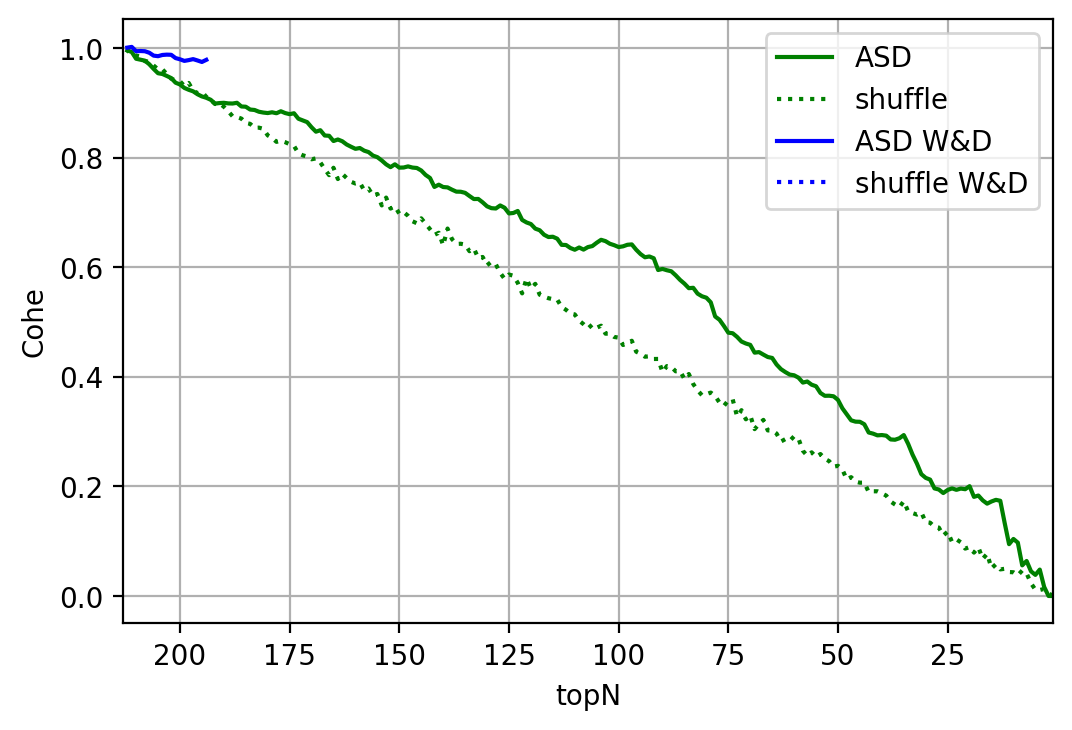

In [23]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), XXX1[1:213], label="ASD", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), YYY1[1:213], label="shuffle", color="green", linestyle="dotted")
ax.plot(list(range(1,213,1)), XXX2[1:213], label="ASD W&D", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), YYY2[1:213], label="shuffle W&D", color="blue", linestyle="dotted")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
plt.grid(True)
plt.xlabel("topN")
plt.ylabel("Cohe")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Ratio')

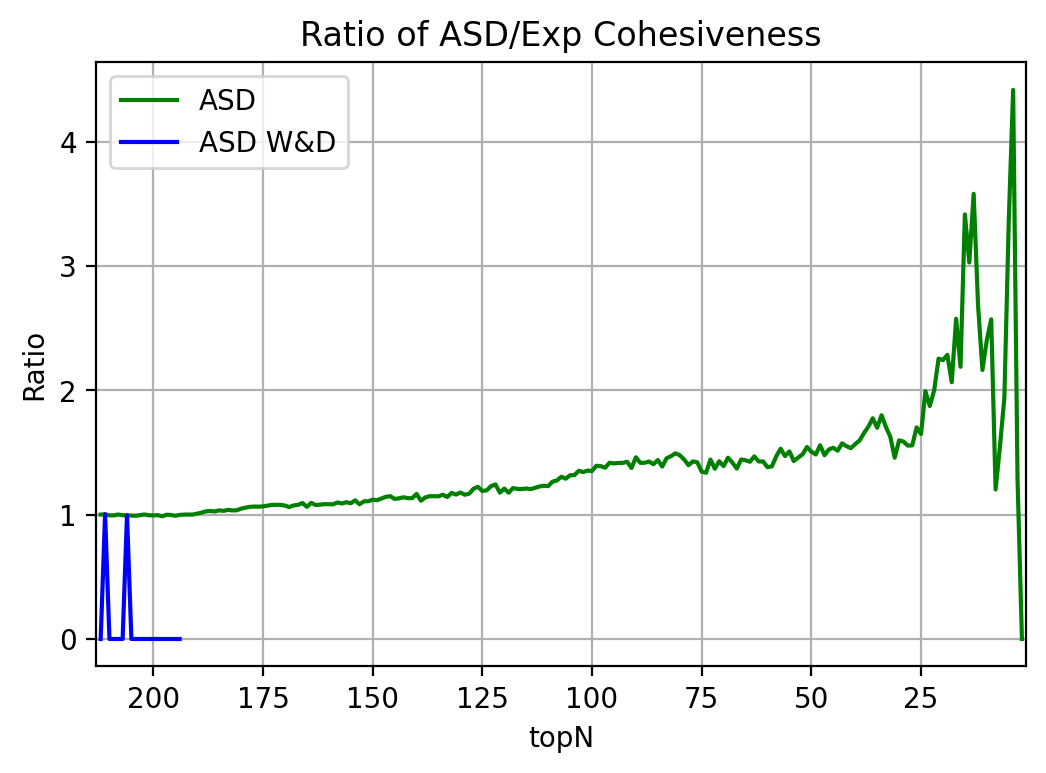

In [21]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), np.array(XXX1[1:213])/np.array(YYY1[1:213]), label="ASD", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), np.array(XXX2[1:213])/np.array(YYY2[1:213]), label="ASD W&D", color="blue", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("topN")
plt.ylabel("Ratio")

In [25]:
CandidateNodes = ASD_Meta_Spec.head(50).index.values
Init_States = np.ones(len(CandidateNodes))
for idx in range(len(Init_States)):
    if np.random.rand() > 0.5:
        Init_States[idx] = 0
asd_meta_cir = MostCohesiveCirtuis(Init_States, g, CandidateNodes, EdgeWeightsDict)

In [46]:
asd_meta_cir.copy_strategy = "deepcopy"
asd_meta_cir.Tmax=1
asd_meta_cir.Tmin=0.0001
Tmps, Energys, state, e = asd_meta_cir.anneal()
print("Done")


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00010          0.48     0.00%     0.00%      20000.00     0:01:46     0:00:00

Done


In [47]:
print(1-e, state)

0.524883273028788 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1.]


In [35]:
InCirtuitNodes = CandidateNodes[np.where(asd_meta_cir.state==1)[0]]
print(list(InCirtuitNodes))

['Dentate_gyrus', 'Orbital_area_lateral_part', 'Prelimbic_area', 'Field_CA1', 'Infralimbic_area', 'Dorsal_peduncular_area', 'Orbital_area_ventrolateral_part', 'Nucleus_accumbens', 'Field_CA2', 'Anterior_olfactory_nucleus', 'Subiculum_dorsal_part', 'Field_CA3', 'Claustrum', 'Primary_visual_area', 'Lateral_posterior_nucleus_of_the_thalamus', 'Anteromedial_visual_area', 'Primary_somatosensory_area_lower_limb', 'Anterior_cingulate_area_dorsal_part', 'Endopiriform_nucleus_dorsal_part', 'Retrosplenial_area_lateral_agranular_part', 'Parafascicular_nucleus', 'Primary_somatosensory_area_trunk', 'Caudoputamen', 'Posterior_parietal_association_areas', 'Anterior_cingulate_area_ventral_part', 'Orbital_area_medial_part', 'Agranular_insular_area_ventral_part', 'Nucleus_of_reuniens', 'Secondary_motor_area', 'Lateral_septal_nucleus_caudal_caudodorsal_part', 'Accessory_olfactory_bulb', 'Presubiculum', 'Submedial_nucleus_of_the_thalamus', 'Taenia_tecta', 'Mediodorsal_nucleus_of_thalamus', 'Basolateral_am

In [36]:
OutCirtuitNodes = CandidateNodes[np.where(asd_meta_cir.state==0)[0]]
print(len(OutCirtuitNodes))
print(list(OutCirtuitNodes))

14
['Anterior_pretectal_nucleus', 'Subiculum_ventral_part', 'Basomedial_amygdalar_nucleus', 'Primary_motor_area', 'Intercalated_amygdalar_nucleus', 'Gustatory_areas', 'Lateral_septal_nucleus_ventral_part', 'Endopiriform_nucleus_ventral_part', 'Bed_nuclei_of_the_stria_terminalis', 'Posterolateral_visual_area', 'Lateral_amygdalar_nucleus', 'Parasubiculum', 'Central_amygdalar_nucleus', 'Lateral_septal_nucleus_rostral_rostroventral_part']


In [39]:
XX = ['Dentate_gyrus', 'Prelimbic_area', 'Orbital_area_lateral_part', 'Field_CA1', 'Infralimbic_area', 'Dorsal_peduncular_area', 'Nucleus_accumbens', 'Field_CA2', 'Lateral_posterior_nucleus_of_the_thalamus', 'Orbital_area_ventrolateral_part', 'Claustrum', 'Field_CA3', 'Anterior_olfactory_nucleus', 'Endopiriform_nucleus_dorsal_part', 'Subiculum_dorsal_part', 'Anterior_cingulate_area_dorsal_part', 'Primary_visual_area', 'Anteromedial_visual_area', 'Nucleus_of_reuniens', 'Accessory_olfactory_bulb', 'Retrosplenial_area_lateral_agranular_part', 'Orbital_area_medial_part', 'Secondary_motor_area', 'Anterior_cingulate_area_ventral_part', 'Presubiculum', 'Agranular_insular_area_ventral_part', 'Mediodorsal_nucleus_of_thalamus', 'Lateral_septal_nucleus_caudal_caudodorsal_part', 'Basolateral_amygdalar_nucleus', 'Submedial_nucleus_of_the_thalamus', 'Primary_somatosensory_area_trunk', 'Posterior_parietal_association_areas', 'Lateral_visual_area', 'Taenia_tecta']

In [41]:
set1 = set(InCirtuitNodes)
set2 = set(XX)

In [42]:
set1.intersection(set2)

{'Accessory_olfactory_bulb',
 'Agranular_insular_area_ventral_part',
 'Anterior_cingulate_area_dorsal_part',
 'Anterior_cingulate_area_ventral_part',
 'Anterior_olfactory_nucleus',
 'Anteromedial_visual_area',
 'Basolateral_amygdalar_nucleus',
 'Claustrum',
 'Dentate_gyrus',
 'Dorsal_peduncular_area',
 'Endopiriform_nucleus_dorsal_part',
 'Field_CA1',
 'Field_CA2',
 'Field_CA3',
 'Infralimbic_area',
 'Lateral_posterior_nucleus_of_the_thalamus',
 'Lateral_septal_nucleus_caudal_caudodorsal_part',
 'Mediodorsal_nucleus_of_thalamus',
 'Nucleus_accumbens',
 'Nucleus_of_reuniens',
 'Orbital_area_lateral_part',
 'Orbital_area_medial_part',
 'Orbital_area_ventrolateral_part',
 'Posterior_parietal_association_areas',
 'Prelimbic_area',
 'Presubiculum',
 'Primary_somatosensory_area_trunk',
 'Primary_visual_area',
 'Retrosplenial_area_lateral_agranular_part',
 'Secondary_motor_area',
 'Subiculum_dorsal_part',
 'Submedial_nucleus_of_the_thalamus',
 'Taenia_tecta'}

In [44]:
set1.difference(set2)

{'Caudoputamen',
 'Parafascicular_nucleus',
 'Primary_somatosensory_area_lower_limb'}

In [45]:
set2.difference(set1)

{'Lateral_visual_area'}

In [65]:
0.36 / 0.31

1.161290322580645

In [66]:
0.49 / 0.41

1.1951219512195121

In [67]:
0.49 / 0.31

1.5806451612903225